In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Base de données Airbnb cleaned 

In [2]:
df_airbnb = pd.read_csv('data_cleaned.csv')
df_airbnb.head()

,Unnamed: 0,ID,Name,Summary,Space,Neighborhood Overview,Notes,Transit,Interaction,Host Since,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
0,0,5380461,"Roland Garros, Appart. 2 p. avec balcon, Auteuil.","Appart. ascenc. 1 ch. avec lit double, cuisine...",L'appartement est situé dans le quartier résid...,"J'apprécie le côté résidentiel du quartier, ca...",Nombreux commerces et restaurants à proximité.,Vous pourrez accéder à l'appartement par les l...,Je souhaite louer mon appartement à des person...,2015-02-17,...,7.0,8.0,9.0,9.0,10.0,7.0,flexible,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact"
1,1,12994171,APARTMENT 100 M2,location trocadero Passy very well located ans...,la situation et la tranquillité ainsi que l'ac...,situation à 5 min à pied de la tour Eiffel et ...,NaN,métro à 3 min à pied,si vous avez des besoins particuliers ...cours...,2016-05-12,...,10.0,10.0,10.0,10.0,10.0,9.0,strict,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact"
2,2,16270986,Appartement familial église d'auteuil,"Mon logement est proche de Beaugrenelle Paris,...",NaN,NaN,NaN,NaN,NaN,2016-10-25,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant..."
3,3,16267918,Studio 25m2 16e arrondissement,Petit studio situé dans le 16 e arrondissement...,NaN,"Boulangerie, coiffeur, Franprix etc",NaN,Bus 72 et 22 arrêt victorien Sardou Météo lig...,NaN,2015-12-11,...,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact"
4,4,8531724,Cosy and bright flat,"Nice flat, recently renovated, bright and cosy...",The flat is in the 4th floor of a secure build...,The area is very pleasant and chic. It is both...,The bedsheets and towels are included in the r...,The flat is very well located for transportati...,I will welcome you in the flat to give you the...,2014-01-28,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact"


# Tests pour essayer de calculer la distance du métro le plus proche 

## DO NOT PAY ATTENTION

In [3]:
df_ratp = pd.read_csv('ratp.csv',sep=';')
df_ratp.head()

,ID,Name,Description,Coordinates
0,3677677,RUE DE LA FERME,ROND-POINT MARTIN LUTHER KING - 77258,"48.8359484574,2.62990289517"
1,3677688,COLLEGE LE LUZARD,COURS DES ROCHES - 77337,"48.8467902961,2.61369101"
2,3678812,ZONE TECHNIQUE,ROUTE DES ANNIVERSAIRES - 95527,"49.0119496186,2.5332905562"
3,3678816,ENTRETIEN NORD,ROUTE DE L'ARPENTEUR - 95527,"49.0114652199,2.51552950645"
4,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589"


In [4]:
split_data = df_ratp["Coordinates"].str.split(",")
data = split_data.to_list()
names = ["latitude", "longitude"]
new_df_ratp = pd.DataFrame(data, columns=names)

print(new_df_ratp)


            latitude      longitude
0      48.8359484574  2.62990289517
1      48.8467902961     2.61369101
2      49.0119496186   2.5332905562
3      49.0114652199  2.51552950645
4      48.8500655011  2.49939528589
...              ...            ...
25333  48.9033027924  2.19339213468
25334  48.8891783882  2.23088294789
25335  48.7882424652  2.29326524827
25336  48.7857019409  2.30251642637
25337  48.7797434214  2.28046129207

[25338 rows x 2 columns]


In [5]:
subways = []
for i in range(len(new_df_ratp['latitude'])):
    liste = [new_df_ratp['latitude'][i], new_df_ratp['longitude'][i]]
    subways.append(liste)
print (subways)

[['48.8359484574', '2.62990289517'], ['48.8467902961', '2.61369101'], ['49.0119496186', '2.5332905562'], ['49.0114652199', '2.51552950645'], ['48.8500655011', '2.49939528589'], ['48.8568322265', '2.53011636369'], ['48.8706786201', '2.57648895982'], ['48.8744671511', '2.58293737522'], ['48.8767496173', '2.59993914757'], ['48.8528305972', '2.51416708032'], ['48.8542938059', '2.52125422739'], ['48.8650165142', '2.52080187056'], ['48.8556887852', '2.52000614566'], ['48.8531609882', '2.45842472981'], ['48.8557049943', '2.48207479406'], ['48.8623287414', '2.48206604851'], ['48.8442170813', '2.44079723454'], ['48.8526418121', '2.4807996665'], ['48.8534150426', '2.48782935918'], ['48.8668556506', '2.48429921025'], ['48.8446246824', '2.43709423281'], ['48.8518828941', '2.45121735798'], ['48.8560696327', '2.46161860012'], ['48.8565224898', '2.46678170321'], ['48.8561601595', '2.4609922971'], ['48.8381727427', '2.49436130739'], ['48.8147969334', '2.42270643461'], ['48.9270177692', '2.37991628424'

In [6]:
split_data2 = df_airbnb["Geolocation"].str.split(",")
data2 = split_data2.to_list()
names2 = ["latitude", "longitude"]
new_df_airbnb = pd.DataFrame(data2, columns=names2)

print(new_df_airbnb)


            latitude      longitude
0      48.8445603313  2.26336692547
1      48.8580714183  2.28022090415
2      48.8502032736  2.27083162889
3      48.8420130083  2.26885375663
4      48.8410481577  2.25944805867
...              ...            ...
40039  48.8619682733  2.40198612937
40040  48.8664429191  2.39643395508
40041  48.8663673103  2.39473441637
40042  48.8680706349  2.39800286126
40043  48.8708829579  2.39860044242

[40044 rows x 2 columns]


In [7]:
houses = []
for i in range(len(new_df_airbnb['latitude'])):
    liste = [new_df_airbnb['latitude'][i], new_df_airbnb['longitude'][i]]
    houses.append(liste)
print (houses)

[['48.8445603313', '2.26336692547'], ['48.8580714183', '2.28022090415'], ['48.8502032736', '2.27083162889'], ['48.8420130083', '2.26885375663'], ['48.8410481577', '2.25944805867'], ['48.8535456811', '2.26817102772'], ['48.8554534052', '2.27448395699'], ['48.865849307', '2.27818989886'], ['48.857774609', '2.27437430312'], ['48.8687600332', '2.28096029249'], ['48.855218545', '2.2705888532'], ['48.8494797599', '2.26700491497'], ['48.8309404867', '2.3296725949'], ['48.8270382907', '2.32538289617'], ['48.8238974713', '2.31834320735'], ['48.8260773409', '2.33492875645'], ['48.837857057', '2.33363912927'], ['48.8287529542', '2.3175328533'], ['48.8351691578', '2.33306891972'], ['48.8405266901', '2.32289362642'], ['48.8318931788', '2.32947744659'], ['48.8266815551', '2.3293188632'], ['48.8351559376', '2.33026559142'], ['48.8361276341', '2.32604985483'], ['48.81940302', '2.33201316819'], ['48.8414048795', '2.32336687352'], ['48.8338895008', '2.32769697909'], ['48.831274298', '2.33424334813'], ['

In [14]:
# Calcul des distances 
from geopy.distance import geodesic
distances = []
resultat = []
for i in range(5):
    #distances.append([])
    for j in range(len(subways)):
        distance = geodesic(houses[i],subways[j]).km
        resultat.append(distance)
    min_idx = min(resultat, key=float)
    distances.append(min_idx)
        
print(distances)

[0.09016287366087052, 0.037158316747111286, 0.037158316747111286, 0.037158316747111286, 0.037158316747111286]


In [15]:
# Extraction des codes postaux
from geopy.geocoders import Nominatim
import itertools

zip_code = []
for i in range(5): 
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    location = geolocator.reverse(df_airbnb["Geolocation"][i])
    #out = list(itertools.chain(*location))
    zip_code.append(location)
print(zip_code)

[Location(2, Avenue Despréaux, Hameau Boileau, Quartier d'Auteuil, Paris, Île-de-France, France métropolitaine, 75016, France, (48.8444329, 2.2633322, 0.0)), Location(1, Rue Massenet, Paris 16e Arrondissement, Paris, Île-de-France, France métropolitaine, 75116, France, (48.8579723, 2.280006, 0.0)), Location(5, Rue du Père Brottier, Hameau Boileau, Paris 16e Arrondissement, Paris, Île-de-France, France métropolitaine, 75016, France, (48.850092, 2.2707303, 0.0)), Location(École maternelle, 141, Avenue de Versailles, Hameau Boileau, Quartier d'Auteuil, Paris, Île-de-France, France métropolitaine, 75016, France, (48.841955850000005, 2.268661852044442, 0.0)), Location(Avenue Transversale, Hameau Boileau, Quartier d'Auteuil, Paris, Île-de-France, France métropolitaine, 75016, France, (48.84107591748983, 2.259412997546826, 0.0))]


# Préparation des données  

## Colonne 'Calendar Updated' 

In [3]:
# Colonne que l'on va modifier
df_airbnb['Calendar Updated']

0          4 days ago
1               today
2               today
3        4 months ago
4        6 months ago
             ...     
40039      a week ago
40040    8 months ago
40041      a week ago
40042           today
40043     3 weeks ago
Name: Calendar Updated, Length: 40044, dtype: object

In [4]:
# Transformation des différentes unités de mesures (jours, semaines, mois etc.) en jours 
from re import search

calendar_updated_indays = []

for i in range(len(df_airbnb['Calendar Updated'])): 
    if search('days ago', df_airbnb['Calendar Updated'][i]):
        # Si le chiffre est déjà en nombre de jours, on ne garde que le nombre de jours
        calendar_updated_indays.append(df_airbnb['Calendar Updated'][i][0])
    elif search('week ago', df_airbnb['Calendar Updated'][i]):
        # Si la date mentionne que c'était il y a 1 semaine, on renvoie 7 jours
        calendar_updated_indays.append(7)
    elif search('weeks ago', df_airbnb['Calendar Updated'][i]):
        # Si la date mentionne que c'était il y a n mois, on renvoie n * 30 jours par mois 
        calendar_updated_indays.append(int(df_airbnb['Calendar Updated'][i][0])*7)
    elif search('months ago', df_airbnb['Calendar Updated'][i]):
        calendar_updated_indays.append(int(df_airbnb['Calendar Updated'][i][0])*30)
    elif search('yesterday', df_airbnb['Calendar Updated'][i]):
        calendar_updated_indays.append(2)
    elif search('today', df_airbnb['Calendar Updated'][i]):
        calendar_updated_indays.append(1)
    else: 
        #Inclut les valeurs vides et les mentions "never"
        calendar_updated_indays.append(0)

print (calendar_updated_indays[0:100])

['4', 1, 1, 120, 180, 30, 7, 210, 14, '2', 90, '6', 14, '4', 30, '3', 7, 120, 7, 30, 14, '5', 210, 2, 14, 60, '5', 60, 1, 2, 210, 7, 270, 21, 14, 14, 270, '3', 60, 7, 2, 90, 1, 1, '3', 240, 14, 7, 1, 240, 60, 14, 60, 90, 120, 14, 1, 42, 14, 14, 28, 90, 1, 2, 120, 90, 42, 30, 60, 35, 42, 21, 7, 120, '5', 60, 2, 42, '5', 270, 42, 60, 7, '2', 21, '2', '3', 1, 7, 1, 30, 7, '3', 14, 7, 90, 1, 35, 150, 30]


In [5]:
# Conversion de la liste d'object vers une pandas Series de Int
new_cal = pd.Series(calendar_updated_indays, dtype=np.dtype("int64"))

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:2339: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [6]:
# Ajout de la nouvelle liste créée (avec les nouvelles unités de mesures), au Dataframe df_airbnb
df_new_cal = pd.DataFrame(new_cal) 
df_new_cal.columns = ['Calendar Updated (in days)']
df = pd.concat([df_airbnb,df_new_cal], axis=1, sort=False)
df.head()

,Unnamed: 0,ID,Name,Summary,Space,Neighborhood Overview,Notes,Transit,Interaction,Host Since,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features,Calendar Updated (in days)
0,0,5380461,"Roland Garros, Appart. 2 p. avec balcon, Auteuil.","Appart. ascenc. 1 ch. avec lit double, cuisine...",L'appartement est situé dans le quartier résid...,"J'apprécie le côté résidentiel du quartier, ca...",Nombreux commerces et restaurants à proximité.,Vous pourrez accéder à l'appartement par les l...,Je souhaite louer mon appartement à des person...,2015-02-17,...,8.0,9.0,9.0,10.0,7.0,flexible,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact",4
1,1,12994171,APARTMENT 100 M2,location trocadero Passy very well located ans...,la situation et la tranquillité ainsi que l'ac...,situation à 5 min à pied de la tour Eiffel et ...,NaN,métro à 3 min à pied,si vous avez des besoins particuliers ...cours...,2016-05-12,...,10.0,10.0,10.0,10.0,9.0,strict,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact",1
2,2,16270986,Appartement familial église d'auteuil,"Mon logement est proche de Beaugrenelle Paris,...",NaN,NaN,NaN,NaN,NaN,2016-10-25,...,10.0,10.0,10.0,10.0,10.0,flexible,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant...",1
3,3,16267918,Studio 25m2 16e arrondissement,Petit studio situé dans le 16 e arrondissement...,NaN,"Boulangerie, coiffeur, Franprix etc",NaN,Bus 72 et 22 arrêt victorien Sardou Météo lig...,NaN,2015-12-11,...,10.0,10.0,10.0,9.0,10.0,moderate,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact",120
4,4,8531724,Cosy and bright flat,"Nice flat, recently renovated, bright and cosy...",The flat is in the 4th floor of a secure build...,The area is very pleasant and chic. It is both...,The bedsheets and towels are included in the r...,The flat is very well located for transportati...,I will welcome you in the flat to give you the...,2014-01-28,...,10.0,10.0,10.0,10.0,10.0,moderate,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact",180


In [7]:
df.dtypes

Unnamed: 0                       int64
ID                               int64
Name                            object
Summary                         object
Space                           object
Neighborhood Overview           object
Notes                           object
Transit                         object
Interaction                     object
Host Since                      object
Host Verifications              object
Neighbourhood Cleansed          object
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Amenities                       object
Price                          float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Calendar Updated         

In [8]:
# Suppression de la colonne 'Unnamed: 0' et 'Calendar Updated'
df.drop(columns=['Unnamed: 0', 'Calendar Updated'], inplace=True)

In [9]:
df.columns

Index(['ID', 'Name', 'Summary', 'Space', 'Neighborhood Overview', 'Notes',
       'Transit', 'Interaction', 'Host Since', 'Host Verifications',
       'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Geolocation', 'Features', 'Calendar Updated (in days)'],
      dtype='object')

## Colonne 'Host since'

In [10]:
df.dtypes

ID                               int64
Name                            object
Summary                         object
Space                           object
Neighborhood Overview           object
Notes                           object
Transit                         object
Interaction                     object
Host Since                      object
Host Verifications              object
Neighbourhood Cleansed          object
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Amenities                       object
Price                          float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Availability 60                  int64
Review Scores Accuracy   

In [11]:
# Conversion de la colonne 'Host since' en date
df['Host Since'] =  pd.to_datetime(df['Host Since'])

In [12]:
# Création d'une liste qui soustraie la date d'aujourd'hui à la date à laquelle l'hôte s'est inscrit 
# Retourne le nombre jours correspondant pour chaque hôte, dans une liste 

from datetime import datetime

host_since_days = []

for i in range(len(df['Host Since'])): 
    today = datetime.strptime('2020/04/15',"%Y/%m/%d") 
    delta = today - df['Host Since'][i] 
    host_since_days.append(delta.days)
print (host_since_days[0:50]) 

[1884, 1434, 1268, 1587, 2269, 3204, 1866, 2410, 1808, 2741, 1767, 2465, 2029, 1338, 2235, 1248, 1357, 2606, 2162, 1583, 1384, 1499, 2146, 2600, 1878, 1868, 1314, 1271, 1901, 2766, 1731, 3192, 2830, 1231, 2282, 2516, 2618, 2470, 2453, 1644, 2236, 2675, 1162, 1325, 3260, 2154, 1845, 2053, 1965, 1907]


In [13]:
# Conversion de la liste de float vers une pandas Series de Int
to_int = pd.array(host_since_days, dtype=pd.Int64Dtype())
new_host_since_days = pd.Series(to_int)

In [14]:
# Ajout de la pandas Series créée (dans la nouvelle unité de mesure = jours), au Dataframe df
df_new_host = pd.DataFrame(new_host_since_days) 
df_new_host.columns = ['Host since (in days)']
df = pd.concat([df,df_new_host], axis=1, sort=False)
df.head()

,ID,Name,Summary,Space,Neighborhood Overview,Notes,Transit,Interaction,Host Since,Host Verifications,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features,Calendar Updated (in days),Host since (in days)
0,5380461,"Roland Garros, Appart. 2 p. avec balcon, Auteuil.","Appart. ascenc. 1 ch. avec lit double, cuisine...",L'appartement est situé dans le quartier résid...,"J'apprécie le côté résidentiel du quartier, ca...",Nombreux commerces et restaurants à proximité.,Vous pourrez accéder à l'appartement par les l...,Je souhaite louer mon appartement à des person...,2015-02-17,"email,phone,reviews",...,9.0,9.0,10.0,7.0,flexible,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact",4,1884
1,12994171,APARTMENT 100 M2,location trocadero Passy very well located ans...,la situation et la tranquillité ainsi que l'ac...,situation à 5 min à pied de la tour Eiffel et ...,NaN,métro à 3 min à pied,si vous avez des besoins particuliers ...cours...,2016-05-12,"email,phone,reviews",...,10.0,10.0,10.0,9.0,strict,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact",1,1434
2,16270986,Appartement familial église d'auteuil,"Mon logement est proche de Beaugrenelle Paris,...",NaN,NaN,NaN,NaN,NaN,2016-10-25,"email,phone,facebook,reviews",...,10.0,10.0,10.0,10.0,flexible,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant...",1,1268
3,16267918,Studio 25m2 16e arrondissement,Petit studio situé dans le 16 e arrondissement...,NaN,"Boulangerie, coiffeur, Franprix etc",NaN,Bus 72 et 22 arrêt victorien Sardou Météo lig...,NaN,2015-12-11,"email,phone,reviews",...,10.0,10.0,9.0,10.0,moderate,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact",120,1587
4,8531724,Cosy and bright flat,"Nice flat, recently renovated, bright and cosy...",The flat is in the 4th floor of a secure build...,The area is very pleasant and chic. It is both...,The bedsheets and towels are included in the r...,The flat is very well located for transportati...,I will welcome you in the flat to give you the...,2014-01-28,"email,phone,reviews",...,10.0,10.0,10.0,10.0,moderate,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact",180,2269


In [15]:
# Suppression de la colonne 'Host Since'
df.drop(columns=['Host Since'], inplace=True)

In [16]:
df.columns

Index(['ID', 'Name', 'Summary', 'Space', 'Neighborhood Overview', 'Notes',
       'Transit', 'Interaction', 'Host Verifications',
       'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Geolocation', 'Features', 'Calendar Updated (in days)',
       'Host since (in days)'],
      dtype='object')

## Colonne 'Amenities'

In [17]:
# Comptage du nombre d'Amenities; sur la base d'un comptage du nb de string séparés par des virgules
# Retourne le nombre d'Amenities correspondant pour chaque annonce, dans une liste 

nb_amenities = []

for i in range(len(df['Amenities'])):
    amenities_count = len(str(df['Amenities'][i]).split(','))
    nb_amenities.append(int(amenities_count))

print (nb_amenities[0:10])

[14, 23, 19, 13, 15, 13, 8, 7, 19, 20]


In [18]:
# Ajout de la pandas Series créée (comptant le nb d'Amenities), au Dataframe df
df_count_amenities = pd.DataFrame(nb_amenities) 
df_count_amenities.columns = ['Number of Amenities']
df = pd.concat([df,df_count_amenities], axis=1, sort=False)
df.head()

,ID,Name,Summary,Space,Neighborhood Overview,Notes,Transit,Interaction,Host Verifications,Neighbourhood Cleansed,...,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features,Calendar Updated (in days),Host since (in days),Number of Amenities
0,5380461,"Roland Garros, Appart. 2 p. avec balcon, Auteuil.","Appart. ascenc. 1 ch. avec lit double, cuisine...",L'appartement est situé dans le quartier résid...,"J'apprécie le côté résidentiel du quartier, ca...",Nombreux commerces et restaurants à proximité.,Vous pourrez accéder à l'appartement par les l...,Je souhaite louer mon appartement à des person...,"email,phone,reviews",Passy,...,9.0,10.0,7.0,flexible,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact",4,1884,14
1,12994171,APARTMENT 100 M2,location trocadero Passy very well located ans...,la situation et la tranquillité ainsi que l'ac...,situation à 5 min à pied de la tour Eiffel et ...,NaN,métro à 3 min à pied,si vous avez des besoins particuliers ...cours...,"email,phone,reviews",Passy,...,10.0,10.0,9.0,strict,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact",1,1434,23
2,16270986,Appartement familial église d'auteuil,"Mon logement est proche de Beaugrenelle Paris,...",NaN,NaN,NaN,NaN,NaN,"email,phone,facebook,reviews",Passy,...,10.0,10.0,10.0,flexible,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant...",1,1268,19
3,16267918,Studio 25m2 16e arrondissement,Petit studio situé dans le 16 e arrondissement...,NaN,"Boulangerie, coiffeur, Franprix etc",NaN,Bus 72 et 22 arrêt victorien Sardou Météo lig...,NaN,"email,phone,reviews",Passy,...,10.0,9.0,10.0,moderate,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact",120,1587,13
4,8531724,Cosy and bright flat,"Nice flat, recently renovated, bright and cosy...",The flat is in the 4th floor of a secure build...,The area is very pleasant and chic. It is both...,The bedsheets and towels are included in the r...,The flat is very well located for transportati...,I will welcome you in the flat to give you the...,"email,phone,reviews",Passy,...,10.0,10.0,10.0,moderate,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact",180,2269,15


In [19]:
# Suppression de la colonne 'Amenities'
df.drop(columns=['Amenities'], inplace=True)

In [20]:
df.columns

Index(['ID', 'Name', 'Summary', 'Space', 'Neighborhood Overview', 'Notes',
       'Transit', 'Interaction', 'Host Verifications',
       'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Geolocation', 'Features', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities'],
      dtype='object')

## Colonne 'Host verifications'

In [21]:
# Comptage du nombre de Host verifications; sur la base d'un comptage du nb de string séparés par des virgules
# Retourne pour chaque annonce, le nombre de documents vérifiés par Airbnb et prouvant l'identité de l'Host, 
    #dans une liste 

nb_verifications = []

for i in range(len(df['Host Verifications'])):
    verifications_count = len(str(df['Host Verifications'][i]).split(','))
    nb_verifications.append(int(verifications_count))

print (nb_verifications[0:10])

[3, 3, 4, 3, 3, 4, 4, 4, 5, 3]


In [22]:
# Ajout de la pandas Series créée (comptant le nb d'élements vérifiés), au Dataframe df
df_count_verifications = pd.DataFrame(nb_verifications) 
df_count_verifications.columns = ['Number of host verifications']
df = pd.concat([df,df_count_verifications], axis=1, sort=False)
df.head()

,ID,Name,Summary,Space,Neighborhood Overview,Notes,Transit,Interaction,Host Verifications,Neighbourhood Cleansed,...,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features,Calendar Updated (in days),Host since (in days),Number of Amenities,Number of host verifications
0,5380461,"Roland Garros, Appart. 2 p. avec balcon, Auteuil.","Appart. ascenc. 1 ch. avec lit double, cuisine...",L'appartement est situé dans le quartier résid...,"J'apprécie le côté résidentiel du quartier, ca...",Nombreux commerces et restaurants à proximité.,Vous pourrez accéder à l'appartement par les l...,Je souhaite louer mon appartement à des person...,"email,phone,reviews",Passy,...,10.0,7.0,flexible,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact",4,1884,14,3
1,12994171,APARTMENT 100 M2,location trocadero Passy very well located ans...,la situation et la tranquillité ainsi que l'ac...,situation à 5 min à pied de la tour Eiffel et ...,NaN,métro à 3 min à pied,si vous avez des besoins particuliers ...cours...,"email,phone,reviews",Passy,...,10.0,9.0,strict,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact",1,1434,23,3
2,16270986,Appartement familial église d'auteuil,"Mon logement est proche de Beaugrenelle Paris,...",NaN,NaN,NaN,NaN,NaN,"email,phone,facebook,reviews",Passy,...,10.0,10.0,flexible,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant...",1,1268,19,4
3,16267918,Studio 25m2 16e arrondissement,Petit studio situé dans le 16 e arrondissement...,NaN,"Boulangerie, coiffeur, Franprix etc",NaN,Bus 72 et 22 arrêt victorien Sardou Météo lig...,NaN,"email,phone,reviews",Passy,...,9.0,10.0,moderate,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact",120,1587,13,3
4,8531724,Cosy and bright flat,"Nice flat, recently renovated, bright and cosy...",The flat is in the 4th floor of a secure build...,The area is very pleasant and chic. It is both...,The bedsheets and towels are included in the r...,The flat is very well located for transportati...,I will welcome you in the flat to give you the...,"email,phone,reviews",Passy,...,10.0,10.0,moderate,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact",180,2269,15,3


In [23]:
# Suppression de la colonne 'Host Verifications'
df.drop(columns=['Host Verifications'], inplace=True)

In [24]:
df.columns

Index(['ID', 'Name', 'Summary', 'Space', 'Neighborhood Overview', 'Notes',
       'Transit', 'Interaction', 'Neighbourhood Cleansed', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 60',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Reviews per Month', 'Geolocation', 'Features',
       'Calendar Updated (in days)', 'Host since (in days)',
       'Number of Amenities', 'Number of host verifications'],
      dtype='object')

## Colonnes de texte

In [25]:
# Suppression des colonnes 
df_treated = df.copy()
df_treated.drop(columns=['ID','Name','Summary','Space','Neighborhood Overview','Notes','Transit','Interaction'], inplace=True)

In [26]:
df_treated.columns

Index(['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Availability 60', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Geolocation', 'Features', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities',
       'Number of host verifications'],
      dtype='object')

## Encoding des variables qualitatives 

### Label Encoding

#### Colonne 'Room Type'

In [28]:
from re import search

room_type = []

for i in range(len(df_treated['Room Type'])): 
    if search('Shared room', df_treated['Room Type'][i]):
        # Si la chambre est partagée, on lui attribut le code 1 
        room_type.append(int(1))
    elif search('Private room', df_treated['Room Type'][i]):
        # Si c'est une chambre privée dans un appartement partagé, on lui attribut le code 2
        room_type.append(int(2))
    elif search('Entire home/apt', df_treated['Room Type'][i]):
        # Si c'est un appartement entier et privé, on lui attribut le code 3
        room_type.append(int(3))
    else: 
        #Inclut les valeurs vides
        room_type.append(int(0))

print (room_type[0:100])

[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3]


#### Colonne 'Bed Type'

In [32]:
from re import search

bed_type = []

for i in range(len(df_treated['Bed Type'])): 
    if search('Airbed', df_treated['Bed Type'][i]):
        # Si le lit est gonflable, on lui attribut le code 1 
        bed_type.append(int(1))
    elif search('Couch', df_treated['Bed Type'][i]):
        # Si c'est un canapé, on lui attribut le code 2
        bed_type.append(int(2))
    elif search('Futon', df_treated['Bed Type'][i]):
        # Si c'est un futon, on lui attribut le code 3
        bed_type.append(int(3))
    elif search('Pull-out Sofa', df_treated['Bed Type'][i]):
        # Si c'est canapé-lit, on lui attribut le code 4
        bed_type.append(int(4))
    elif search('Real Bed', df_treated['Bed Type'][i]):
        # Si c'est un vrai lit, on lui attribut le code 5
        bed_type.append(int(5))
    else: 
        #Inclut les valeurs vides
        bed_type.append(int(0))

print (bed_type[0:100])

[5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 2, 4, 5, 5, 5, 5, 5, 5, 5]


#### Colonne 'Cancellation Policy'

In [34]:
from re import search

cancellation_policy = []

for i in range(len(df_treated['Cancellation Policy'])): 
    if search('flexible', df_treated['Cancellation Policy'][i]):
        # Si les règles d'annulation sont flexibles, on lui attribut le code 1 
        cancellation_policy.append(int(1))
    elif search('moderate', df_treated['Cancellation Policy'][i]):
        # Si les règles d'annulation sont modérées, on lui attribut le code 2
        cancellation_policy.append(int(2))
    elif search('strict', df_treated['Cancellation Policy'][i]):
        # Si les règles d'annulation sont strictes, on lui attribut le code 3
        cancellation_policy.append(int(3))
    elif search('super_strict_30', df_treated['Cancellation Policy'][i]):
        # Si les règles d'annulation sont très strictes, on lui attribut le code 4
        cancellation_policy.append(int(4))
    else: 
        #Inclut les valeurs vides
        cancellation_policy.append(int(0))

print (cancellation_policy[0:100])

[1, 3, 1, 2, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 3, 2, 3, 3, 1, 2, 3, 1, 3, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 3, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1, 3, 3, 2, 2, 2, 3, 3, 1, 3, 2]


In [36]:
# Concaténation des colonnes transformées, au Dataframe df_treated
df_room_type = pd.DataFrame(room_type) 
df_room_type.columns = ['Type of Room']

df_bed_type = pd.DataFrame(bed_type) 
df_bed_type.columns = ['Type of Bed']

df_cancellation_policy = pd.DataFrame(cancellation_policy)
df_cancellation_policy.columns = ['Cancellation_Policy']

df_encoded = pd.concat([df_treated,df_room_type,df_bed_type,df_cancellation_policy], axis=1, sort=False)
df_encoded.head()

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,...,Reviews per Month,Geolocation,Features,Calendar Updated (in days),Host since (in days),Number of Amenities,Number of host verifications,Type of Room,Type of Bed,Cancellation_Policy
0,Passy,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,50.0,500.0,...,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact",4,1884,14,3,3,5,1
1,Passy,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,250.0,750.0,...,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact",1,1434,23,3,3,5,3
2,Passy,Apartment,Entire home/apt,7,1.5,2.0,5.0,Real Bed,165.0,200.0,...,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant...",1,1268,19,4,3,5,1
3,Passy,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,35.0,94.0,...,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact",120,1587,13,3,3,5,2
4,Passy,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,90.0,500.0,...,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact",180,2269,15,3,3,5,2


In [37]:
# Suppression des colonnes transformées
df_encoded.drop(columns=['Room Type', 'Bed Type','Cancellation Policy'], inplace=True)
df_encoded.columns

Index(['Neighbourhood Cleansed', 'Property Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 60',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Reviews per Month',
       'Geolocation', 'Features', 'Calendar Updated (in days)',
       'Host since (in days)', 'Number of Amenities',
       'Number of host verifications', 'Type of Room', 'Type of Bed',
       'Cancellation_Policy'],
      dtype='object')

### One Hot Encoding

#### Colonne 'Features'

In [51]:
# Création d'une variable 'Host is Superhost'
from re import search

super_host = []

for i in range(len(df_encoded['Features'])): 
    if 'Host Is Superhost'in str(df_encoded['Features'][i]):
        #Si l'host est un super host, on lui attribut le code 1 
        super_host.append(int(1))
    else: 
        #Sinon on lui attribut le code 0
        super_host.append(int(0))

print (super_host[0:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [54]:
# Création d'une variable 'Host Has Profile Pic'
from re import search

host_profile_pic = []

for i in range(len(df_encoded['Features'])): 
    if 'Host Has Profile Pic'in str(df_encoded['Features'][i]):
        #Si l'host a une photo de profile, on lui attribut le code 1 
        host_profile_pic.append(int(1))
    else: 
        #Sinon on lui attribut le code 0
        host_profile_pic.append(int(0))

print (host_profile_pic[0:100])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [57]:
# Création d'une variable 'Host Identity Verified'
from re import search

host_id_verified = []

for i in range(len(df_encoded['Features'])): 
    if 'Host Identity Verified'in str(df_encoded['Features'][i]):
        #Si Airbnb a vérifié l'identité de l'Host, on lui attribut le code 1 
        host_id_verified.append(int(1))
    else: 
        #Sinon on lui attribut le code 0
        host_id_verified.append(int(0))

print (host_id_verified[0:100])

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]


In [61]:
# Création d'une variable 'Instant Bookable'
from re import search

instant_bookable = []

for i in range(len(df_encoded['Features'])): 
    if 'Instant Bookable'in str(df_encoded['Features'][i]):
        #Si le logement est reservable immédiatement, on lui attribut le code 1 
        instant_bookable.append(int(1))
    else: 
        #Sinon on lui attribut le code 0
        instant_bookable.append(int(0))

print (instant_bookable[0:100])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [62]:
# Concaténation des nouvelles variables créées, au Dataframe df_encoded
df_super_host = pd.DataFrame(super_host) 
df_super_host.columns = ['Superhost']

df_host_profile_pic = pd.DataFrame(host_profile_pic) 
df_host_profile_pic.columns = ['Host profile pic']

df_host_id_verified = pd.DataFrame(host_id_verified)
df_host_id_verified.columns = ['Host ID verified']

df_instant_bookable = pd.DataFrame(instant_bookable)
df_instant_bookable.columns = ['Instant bookable']

df_new_encoded = pd.concat([df_encoded,df_super_host,df_host_profile_pic,df_host_id_verified,df_instant_bookable], axis=1, sort=False)
df_new_encoded.head()

,Neighbourhood Cleansed,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Host since (in days),Number of Amenities,Number of host verifications,Type of Room,Type of Bed,Cancellation_Policy,Superhost,Host profile pic,Host ID verified,Instant bookable
0,Passy,Apartment,2,1.0,1.0,1.0,50.0,500.0,30.0,1,...,1884,14,3,3,5,1,0,1,0,0
1,Passy,Apartment,5,2.0,2.0,2.0,250.0,750.0,90.0,4,...,1434,23,3,3,5,3,0,1,0,0
2,Passy,Apartment,7,1.5,2.0,5.0,165.0,200.0,30.0,1,...,1268,19,4,3,5,1,0,1,0,1
3,Passy,Apartment,2,1.0,0.0,1.0,35.0,94.0,0.0,1,...,1587,13,3,3,5,2,0,1,0,0
4,Passy,Apartment,4,1.0,1.0,2.0,90.0,500.0,30.0,2,...,2269,15,3,3,5,2,0,1,0,0


In [63]:
# Suppression de la colonne 'Features'
df_new_encoded.drop(columns=['Features'], inplace=True)
df_new_encoded.columns

Index(['Neighbourhood Cleansed', 'Property Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Availability 60',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Reviews per Month',
       'Geolocation', 'Calendar Updated (in days)', 'Host since (in days)',
       'Number of Amenities', 'Number of host verifications', 'Type of Room',
       'Type of Bed', 'Cancellation_Policy', 'Superhost', 'Host profile pic',
       'Host ID verified', 'Instant bookable'],
      dtype='object')

# Visualisations sympas

In [35]:
split_data = df["Geolocation"].str.split(",")
data = split_data.to_list()
names = ["latitude", "longitude"]
df_coordinates = pd.DataFrame(data, columns=names)

df_coordinates.head()

,latitude,longitude
0,48.8445603313,2.26336692547
1,48.8580714183,2.28022090415
2,48.8502032736,2.27083162889
3,48.8420130083,2.26885375663
4,48.8410481577,2.25944805867


In [37]:
new_df_airbnb = pd.concat([df,df_coordinates], axis=1, sort=False)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(new_df_airbnb['longitude'],new_df_airbnb['latitude'],hue=new_df_airbnb['Neighbourhood Cleansed'])
plt.ioff()

# Beaucoup trop long a ploter

## Word Cloud des quartiers qui ressortent le plus

In [30]:
pip install wordcloud

     |████████████████████████████████| 163kB 2.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


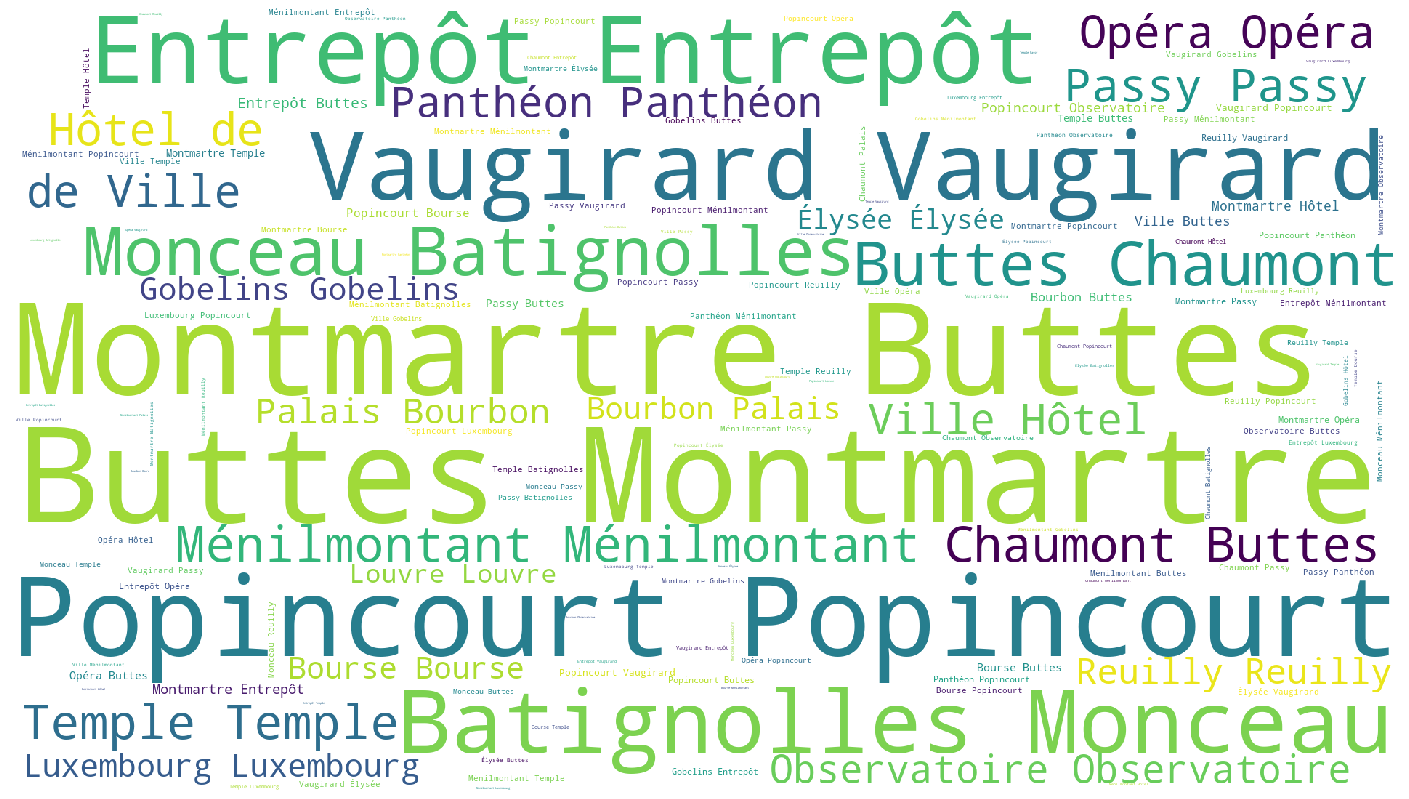

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df['Neighbourhood Cleansed']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()
